<center><h1>Mineria de Datos</header1></center>

Presentado por: Xavier Granda, Bismark Castro, Noelia Anchundia - Grupo 8 <br>
Lider: Xavier Granda  <br>
Fecha: 16/08/2022

# Importación de librerias necesarias

In [32]:
#Para esta actividad se importarán las siguientes librerías:

"""Librerias y modulos para el analisis de datos"""
import numpy as np 
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

#Modules for Machine Learning and Data Preprocessing
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
%matplotlib inline

## Cargar el Dataset

In [33]:
#Código para cargar el Dataset
df = pd.read_csv('data.csv')

## Descripción de la fuente del Dataset

El dataset titulado "Company Bankruptcy Prediction", en otras palabras trata sobre los datos recopilados del Taiwan Economic Journal para los años 1999 a 2009. La quiebra de la empresa se definió con base en las regulaciones comerciales de la Bolsa de Valores de Taiwán. El conjuntos de datos fue tomado del sitio web de kaggle medinate el siguiente link: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction. Nuestro dataset cuenta con un total de 96 columnas o atributos, 6819 Instancias.

Para la descripción de las columnas se detallan los aspectos màs importantes, para facilitar la comprensión de los datos (Y = función de salida, X = funciones de entrada). 

Y - (Bankrupt?) ¿En quiebra?: Etiqueta de clase

X1 - ROA(C) antes de intereses y depreciación antes de intereses: Rentabilidad sobre activos totales(C)

X2 - ROA(A) antes de intereses y % después de impuestos: Rentabilidad sobre activos totales(A)

X3 - ROA(B) antes de intereses y depreciación después de impuestos: Rentabilidad sobre activos totales(B)

X4 - Margen bruto operativo: Utilidad bruta/Ventas netas

X5 - Margen bruto de ventas realizadas: Utilidad bruta realizada/Ventas netas

X6 - Tasa de Utilidad Operativa: Utilidad Operativa/Ventas Netas

X7 - Tasa de interés neta antes de impuestos: Utilidad antes de impuestos Ventas netas

X8 - Tasa de interés neta después de impuestos: Utilidad neta/Ventas netas

X9 - Ingresos y gastos no industriales/ingresos: Ratio de ingresos netos no operativos

X10 - Tasa de interés continua (después de impuestos): Utilidad Neta-Excluye Ganancia o Pérdida por Disposición/Ventas Netas

X11 - Tasa de Gastos Operativos: Gastos Operativos/Ventas Netas

X12 - Tasa de gastos de investigación y desarrollo: (Gastos de investigación y desarrollo)/Ventas netas

X13 - Tasa de flujo de efectivo: flujo de efectivo de operaciones/pasivos corrientes

X14 - Tipo de interés de la deuda con intereses: Deuda con intereses/Patrimonio

X15 - Tasa de impuesto (A): Tasa de impuesto efectiva

X16 - Valor neto por acción (B): valor contable por acción (B)

X17 - Valor Neto Por Acción (A): Valor Contable Por Acción (A)

X18 - Valor neto por acción (C): valor contable por acción (C)

X19 - UPA Persistente en las Últimas Cuatro Temporadas: UPA-Utilidad Neta

X20 - Flujo de efectivo por acción

X21 - Ingresos por acción (Yuan ¥): Ventas por acción

X22 - Beneficio operativo por acción (Yuan ¥): Ingreso operativo por acción

X23 - Beneficio neto por acción antes de impuestos (Yuan ¥): Ingreso por acción antes de impuestos

X24 - Tasa de crecimiento de la ganancia bruta de ventas realizadas

X25 - Tasa de crecimiento de la utilidad operativa: crecimiento de la utilidad operativa

X26 - Tasa de crecimiento de la utilidad neta después de impuestos: Crecimiento de la utilidad neta

X27 - Tasa de crecimiento regular de la utilidad neta: Utilidad operativa continua después del crecimiento de impuestos

X28 - Tasa de crecimiento continuo de la utilidad neta: utilidad neta, excluyendo el crecimiento de la ganancia o pérdida por disposición

X29 - Tasa de crecimiento de activos totales: Crecimiento de activos totales

X30 - Tasa de crecimiento del valor neto: crecimiento del capital total

X31 - Relación de la tasa de crecimiento de la rentabilidad total de los activos: rentabilidad sobre el crecimiento total de los activos

X32 - % de Reinversión en Efectivo: Ratio de Reinversión en Efectivo

X33 - Relación actual

X34 - Proporción rápida: prueba de ácido

X35 - Relación de gastos por intereses: gastos por intereses/ingresos totales

X36 - Deuda total/Patrimonio total: Ratio Pasivo Total/Patrimonio

X37 - Razón de endeudamiento %: Pasivo/Activo Total

X38 - Patrimonio neto/Activos: Patrimonio/Activos totales

X39 - Ratio de idoneidad de fondos a largo plazo (A): (Pasivo a largo plazo+Patrimonio)/Activos fijos

X40 - Dependencia de endeudamiento: Costo de la deuda que devenga intereses

X41 - Pasivos contingentes/Patrimonio neto: Pasivo contingente/Patrimonio

X42 - Utilidad de operación/Capital pagado: Utilidad de operación/Capital

X43 - Utilidad neta antes de impuestos/Capital pagado: Ingresos antes de impuestos/Capital

X44 - Inventarios y cuentas por cobrar/Valor neto: (Inventario+Cuentas por cobrar)/Patrimonio

X45 - Rotación total de activos

X46 - Rotación de cuentas por cobrar

X47 - Días Promedio de Cobranza: Días por Cobrar Pendientes

X48 - Tasa de rotación de inventario (veces)

X49 - Frecuencia de Rotación de Activos Fijos

X50 - Tasa de rotación del patrimonio neto (veces): Rotación de acciones

X51 - Ingresos por persona: Ventas por empleado

X52 - Utilidad de operación por persona: Ingreso de operación por empleado

X53 - Tasa de asignación por persona: Activos fijos por empleado

X54 - Capital de Trabajo a Activos Totales

X55 - Activos rápidos/Activos totales

X56 - Activo circulante/Activo total

X57 - Efectivo/Activos Totales

X58 - Activo rápido/Pasivo corriente

X59 - Efectivo/Pasivo corriente

X60 - Pasivo corriente sobre activos

X61 - Fondos operativos a pasivo

X62 - Inventario/Capital de trabajo

X63 - Inventario/Pasivo corriente

X64 - Pasivo corriente/Pasivo

X65 - Capital de Trabajo/Patrimonio

X66 - Pasivo corriente/Patrimonio

X67 - Pasivo a largo plazo con activos circulantes

X68 - Utilidades retenidas a activos totales

X69 - Ingresos totales/Gastos totales

X70 - Gasto total/Activo

X71 - Tasa de Rotación de Activos Corrientes: Activos Corrientes a Ventas

X72 - Tasa de rotación de activos rápidos: Activos rápidos a ventas

X73 - Tasa de Rotación del Capital de Trabajo: Capital de Trabajo a Ventas

X74 - Tasa de Rotación de Efectivo: Efectivo a Ventas

X75 - Flujo de efectivo a ventas

X76 - Activos Fijos a Activos

X77 - Pasivo corriente a pasivo

X78 - Pasivo corriente a patrimonio

X79 - Patrimonio a pasivo a largo plazo

X80 - Flujo de efectivo a activos totales

X81 - Flujo de efectivo a pasivo

X82 - CFO a Activos

X83 - Flujo de efectivo a capital

X84 - Pasivo circulante a activo circulante

X85 - Indicador de pasivo-activos: 1 si el pasivo total supera los activos totales, 0 en caso contrario

X86 - Utilidad Neta a Activos Totales

X87 - Activos totales a precio del PNB

X88 - Intervalo sin crédito

X89 - Utilidad bruta a ventas

X90 - Utilidad neta a capital contable

X91 - Pasivo a la equidad

X92 - Grado de Apalancamiento Financiero (DFL)

X93 - Tasa de cobertura de intereses (Gastos por intereses a EBIT)

X94 - Indicador de ingresos netos: 1 si los ingresos netos son negativos en los últimos dos años, 0 en caso contrario

X95 - Equidad a Pasivo

## Explique el problema a resolver. 
Como ya se hablo anteriormente, el dataset està basado los datos de ingresos de las empresas Taiwanesas en quiebra. El presente còdigo basado en la estrutura de una ANN (Red Neuronal Artificial) ya que se busca que el modelo logre predecir cuantas empresas podrìas car en banca rota, esto mediante técnicas algorítmicas convencionales. Sem implentò ANN debido a que con los algoritmos de aprendizaje automático como regresión logística, SVM, knn, etc., exista la posibilidad de que la precisión sea menor porque tenemos 95 características (columnas) únicas. La variable objetivo es "Bankrupt?" ya que contiene la etiqueta de si està o no en bancarrota (0-1). Las variabls de entrada son las 95 olumnas restantes, con caracterìaticas de cada empresa. La utilidad de la ANN es predecir con un 97% de precisiòn el modelo.


## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [34]:
'''Número de instancias en total.'''
df.shape

(6819, 96)

In [35]:
'''Número de atributos de entrada, su significado y tipo.'''
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

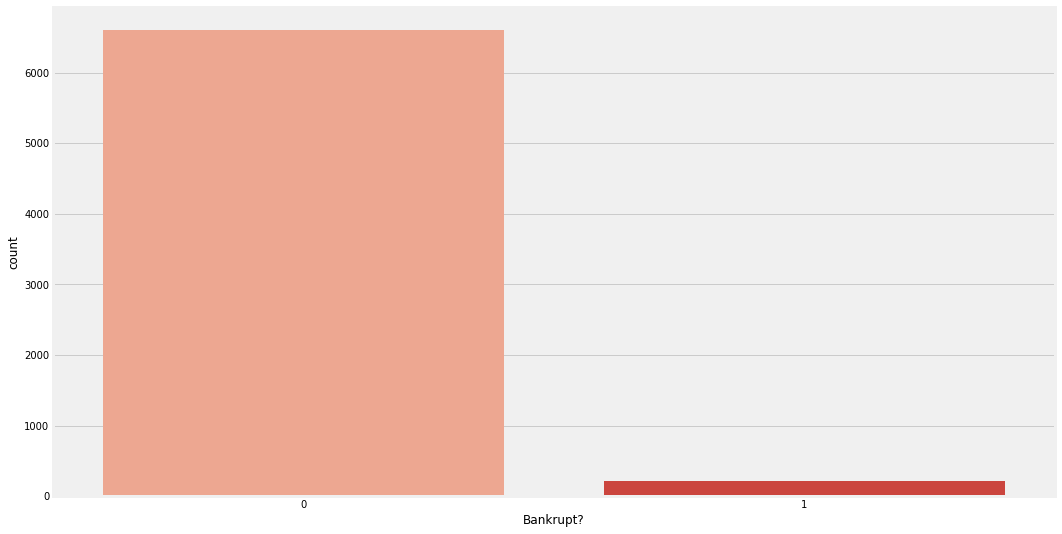

In [36]:
'''Estadísticas de la variable objetivo.'''
df.shape
df.isnull().sum()
plt.figure(figsize=(16,9))
sns.countplot(x = 'Bankrupt?',data = df,palette ='Reds' )
plt.show()

In [37]:
'''Estadísticas los atributos en relación con la variable objetivo.'''
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000



> Se tiene 96 caracteristicas y 6819 registros con tipo de datos int y float. No se tiene datos nulos y tiene información importante sobre tasas de utilidades y solvencia al momento de la predicción de bancarrota.
> Gracias a la preddiciones como el acurrency es posible evitar sus pérdidas económicas con índices financieros como predictores antes y despues de predecir bancarrota y no bancarrota de forma confiable y válida.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [38]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)

"""Haremos una escala para los datos, ya que 
solo queremos usar datos con un rango de 0 a 1.
Con ayuda de la funcion max()>1 para que no pase
de ese valor."""

colum = df.max()[df.max()>1]
colum

 Operating Expense Rate                   9.990000e+09
 Research and development expense rate    9.980000e+09
 Interest-bearing debt interest rate      9.900000e+08
 Revenue Per Share (Yuan ¥)               3.020000e+09
 Total Asset Growth Rate                  9.990000e+09
 Net Value Growth Rate                    9.330000e+09
 Current Ratio                            2.750000e+09
 Quick Ratio                              9.230000e+09
 Total debt/Total net worth               9.940000e+09
 Accounts Receivable Turnover             9.740000e+09
 Average Collection Days                  9.730000e+09
 Inventory Turnover Rate (times)          9.990000e+09
 Fixed Assets Turnover Frequency          9.990000e+09
 Revenue per person                       8.810000e+09
 Allocation rate per person               9.570000e+09
 Quick Assets/Current Liability           8.820000e+09
 Cash/Current Liability                   9.650000e+09
 Inventory/Current Liability              9.910000e+09
 Long-term

In [39]:
"""Del mismo modo para que nos datos no sean menores a 0
con ayuda de la funcion min()<0."""
df.min()[df.min()<0]

Series([], dtype: float64)

Como se observa, no se tienen columas con valores menores que 0, por lo que se procedera a usar la funcion MinMaxScalar para realizar el Feature engineering a nuestro dataset.

In [40]:
"""Se instancia la funcion MinMaxScaler y se hace uso de la funcion 
fit_transform para distribuir los valores en un rango de 0 a 1"""

scale = MinMaxScaler()
scalled = scale.fit_transform(df[colum.keys()])

In [41]:
"""Se recorre el array de la columna creada en busca de los 
datos para escalar y se asignan los nuevos valores con la 
variable de MinMaxScaler previamente creada."""

i = 0
for col in colum.keys():
    df[col] = scalled[:,i]
    i += 1

In [42]:
"""Se muestran los datos estadisicos ya estandarizados 
para tener un contraste con los datos sin estandarizar 
para tener un mejor analisis de estos."""

df[colum.keys()].describe()

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,Accounts Receivable Turnover,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
count,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,...,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03
mean,1.997345e-01,1.954336e-01,1.661415e-02,4.399472e-04,0.551361,1.678684e-04,1.466491e-04,9.075401e-04,4.442995e-04,1.313111e-03,...,1.176153e-03,4.073585e-04,3.850777e-03,5.631363e-03,5.677153e-03,1.195856e-01,2.163735e-01,2.471977e-01,1.466491e-04,1.897089e-03
std,3.240925e-01,2.603499e-01,1.093687e-01,1.712155e-02,0.290062,1.223573e-02,1.210987e-02,2.650972e-02,1.694234e-02,2.856877e-02,...,3.077391e-02,1.945815e-02,5.288610e-02,5.873376e-02,5.977679e-02,2.821161e-01,3.374944e-01,2.938623e-01,1.210987e-02,3.833504e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.568443e-14,1.284448e-14,2.050710e-13,5.175954e-12,0.486486,4.726355e-14,2.747290e-12,5.120155e-13,3.025200e-13,7.290899e-14,...,4.305673e-13,5.940789e-13,2.044567e-13,3.191875e-13,0.000000e+00,1.456236e-14,1.417149e-14,2.735337e-14,1.025966e-11,9.201838e-14
50%,2.780369e-14,5.100200e-02,3.242749e-13,9.064806e-12,0.640641,4.951292e-14,3.849882e-12,8.030847e-13,5.579763e-13,9.936454e-14,...,8.196837e-13,8.967005e-13,5.081748e-13,6.556342e-13,2.069831e-13,1.987816e-14,2.247728e-14,1.080000e-01,2.366359e-11,2.123435e-13
75%,4.149149e-01,3.456914e-01,5.379326e-13,1.535007e-11,0.739740,5.352220e-14,5.916192e-12,1.327097e-12,9.329268e-13,1.493593e-13,...,1.569520e-12,1.468357e-12,1.327002e-12,1.124800e-12,9.440195e-13,4.525945e-14,4.900000e-01,4.510000e-01,4.473557e-11,5.366372e-13
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [43]:
"""Por ultimo comprobamos el dataset para saber si la scala tuvo exito o no."""
df.sample(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2836,0,0.553551,0.590057,0.588950,0.629470,0.629470,0.999191,0.797644,0.809489,0.303504,...,0.826922,4.907885e-13,0.623684,0.629467,0.842396,0.279027,0.026797,0.565188,1,0.032506
4643,0,0.501633,0.552987,0.559987,0.603338,0.603309,0.999051,0.797431,0.809361,0.303424,...,0.806098,4.601309e-13,0.621902,0.603337,0.840908,0.280381,0.027039,0.566114,1,0.027215
568,0,0.463023,0.521969,0.512554,0.594431,0.594431,0.998944,0.797366,0.809294,0.303536,...,0.790563,6.035381e-14,0.625105,0.594429,0.839744,0.276000,0.026738,0.564892,1,0.083636
6044,0,0.543704,0.606356,0.587237,0.600326,0.600326,0.999043,0.797557,0.809445,0.303662,...,0.836381,4.343420e-13,0.624852,0.600326,0.842942,0.278409,0.026818,0.565284,1,0.036199
6105,1,0.430556,0.470508,0.472027,0.595267,0.595267,0.998923,0.797263,0.809196,0.303400,...,0.753568,1.898947e-13,0.623464,0.595262,0.834026,0.288518,0.026691,0.564629,1,0.017228
1264,0,0.493199,0.553969,0.548263,0.606632,0.606632,0.999035,0.797448,0.809370,0.303489,...,0.805394,1.799204e-13,0.623330,0.606627,0.840875,0.280801,0.027325,0.566851,1,0.026050
4988,0,0.507239,0.520443,0.548263,0.597025,0.597025,0.998888,0.797283,0.809215,0.303507,...,0.789352,6.982481e-14,0.623535,0.597022,0.839600,0.277690,0.026580,0.563899,1,0.042408
3949,0,0.549213,0.622547,0.599550,0.625218,0.625218,0.999203,0.797723,0.809606,0.303618,...,0.842025,8.229775e-14,0.624544,0.625213,0.842351,0.275293,0.026791,0.565158,1,0.168439
3713,0,0.556915,0.592401,0.616521,0.611403,0.611403,0.999192,0.797652,0.809554,0.303517,...,0.825548,1.133319e-12,0.623384,0.611401,0.842618,0.280617,0.026881,0.565555,1,0.026541
1137,0,0.489494,0.553260,0.542053,0.598884,0.598877,0.998994,0.797458,0.809372,0.303592,...,0.807292,1.112434e-12,0.623972,0.598883,0.840919,0.279223,0.026982,0.565930,1,0.031545


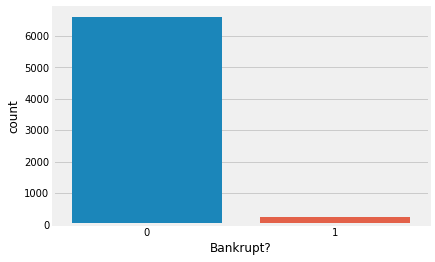

In [44]:
"""Con ayuda de la libreria de Seaborn, observamos y 
analizamos la columna de quiebra o bancarrota de las empresas."""
sns.countplot(x=df['Bankrupt?'])
plt.show()

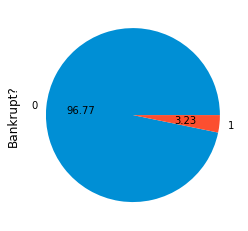

In [45]:
"""El grafico anterior nos identifica un dataset desbalanceado, pues los datos 
de bancarrota 1 para la variable objetivo son muy pocos. Por esto observamos mediante 
un grafico de procentajes para analizar este factor."""

df['Bankrupt?'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [46]:
"""Del mismo modo analizamos el conteo de estos datos."""
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

Se observa que el dataset esta totalmente desbalanceado, pues los casos de bancarrota son muy pocos en comparacion con los de no bancarrota, es por esto que se utilizara un metodo para balancear estos datos. El metodo elegido por su eficiencia y rapidez sera la libreria smote para el balanceo de datos.

In [47]:
"""Observamos todos los datos de X y de Y"""

x, y = df.drop('Bankrupt?',axis=1),df['Bankrupt?']
x.shape,y.shape

((6819, 95), (6819,))

In [48]:
"""Se utiliza la herramienta de smote con el hiperparametro de 
minority para que balancee los datos que tengan menos samples."""

smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)
x.shape,y.shape

((13198, 95), (13198,))

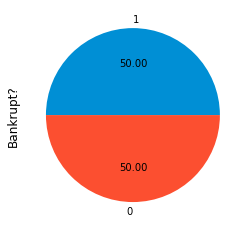

In [49]:
"""Analizamos el conteo de la variable Y para saber si se realizo un balanceo correcto"""

y.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

Se observa un correcto ajuste de los datos, pues ahora tenemos la misma cantidad de datos para 1 y 0 en donde el modelo podra entrenarse de manera optima con todos los samples.

## División del dataset en datos de entrenamiento y datos de test 

In [50]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.

"""Se realizara la division de los datos en 4 partes con ayuda de la funcion train_test_split"""
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9238, 95), (3960, 95), (9238,), (3960,))

## Modelamiento

In [51]:
#Codigo del modelo

"""El modelo utilizado para la prediccion en este caso sera una red neuronal artificial de dos capas.
Una de las capas con la funcion de activacion ReLu para las 95 caracteristicas encontradas y la otra
capa con la funcion de activacion Sigmoid la cual se activa con la variable objetivo. Asimismo se 
compila el modelo con la optimizacion del conjunto de datos ADAM y que indique el acurracy en sus ciclos
de entrenamiento. Por ultimo se utilizara la funcion de binary_crossentropy ya que es un problema de 
clasificacion binaria."""

ann = keras.Sequential([
    keras.layers.Dense(95,input_shape=(95,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [ ]:
#Entrenamiento

"""Se realiza el entrenamiento del modelo con la funcion fit() y las variables creadas anteriormente"""
ann.fit(x_train,y_train,epochs=50)

Epoch 1/50
289/289 [==============================] - 1s 3ms/step - loss: 0.5056 - accuracy: 0.8056
Epoch 2/50
289/289 [==============================] - 1s 3ms/step - loss: 0.3549 - accuracy: 0.8622
Epoch 3/50
289/289 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.8763
Epoch 4/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8827
Epoch 5/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.8857
Epoch 6/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.8849
Epoch 7/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.8844
Epoch 8/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2663 - accuracy: 0.8902
Epoch 9/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.8945
Epoch 10/50
289/289 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.8974

In [ ]:
#Test

"""Se evalua el modelo con las variables de test creadas y la funcion evaluate()."""
ann.evaluate(x_test,y_test)

## Evaluación del Modelo

In [ ]:
"""Con esta funcion predecimos para el modelo entrenado y devuelve si esta o no en bancarrota.
Al contar con datos estandaraizados, el modelo puede devolver datos entre 0 y 1, es decir 
(ejemplo: 0.85), por este motivo si es mayor a 0.5, el modelo dira que es 1 y es menor, dira 
que es 0."""

def predict(model,x):
    pred  = ann.predict(x)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

"""Con los datos de prediccion, creamos una matriz de confusion para el analisis del modelo."""
def predict_graph(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',cmap="YlGnBu",
                xticklabels=['No bancarrota','Bancarrota'],yticklabels=['No bancarrota','Bancarrota'])
    plt.title(title)
    plt.show()
    
    print("\n")
    print("Reporte:")
    print(classification_report(y_true,y_pred))

In [ ]:
y_test_pred = predict(ann,x_test)
predict_graph(y_test,y_test_pred,'Prediccion del modelo entrenado con datos Test.')

# Interpretación de Resultados

En los parámetros de evaluación para el modelo ANN, se puede bservar el Reporte de clasificación de las métricas. Donde se puede evidenciar que nuestro modelo arrojo un Accuracy: 94%, una Precisión: 98.00% para las no banca rota y 90% para las bancas rotas, F1-score 94% y un Recall: entre el 89% para las No banca rota y 98% para las banca rota. Con la precisión podemos notar cuantas veces el modelo predijo de forma precisa. Con el Recall vemos los positivos reales, y mediante el Accuracy se visualiza como 94% de las 100 predicciones arrojaron un resultado correctamente positivo. 

La matriz de confusiòn nos explica como de todo el conjunto de datos, 1798 empresas no se encontraron en banca rota. En cambio 1919 empresas si estàn en banca rota. 243 fueron los datos que el modelo no pudo predecir.  